## Ejemplo 2

In [1]:
using Distributions, StatsPlots, Random

In [2]:
Random.seed!(3)

MersenneTwister(UInt32[0x00000003], Random.DSFMT.DSFMT_state(Int32[-1359582567, 1073454075, 1934390716, 1073583786, -114685834, 1073112842, -1913218479, 1073122729, -73577195, 1073266439  …  1226759590, 1072980451, -1366384707, 1073012992, 1661148031, 2121090155, 141576524, -658637225, 382, 0]), [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], UInt128[0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000  …  0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x000000000

In [47]:
N= 50

μs= [-4.5, 0]

x= mapreduce(c -> rand(MvNormal([μs[c], μs[c]], 1.0), N), hcat, 1:2)

scatter(x[1,:], x[2,:]) 

In [48]:
using Turing, MCMCChains

In [49]:
@model function GaussianMixtureModels(x)
    D,N= size(x)
    
    μ1~ Normal()
    μ2~ Normal()
    
    μ= [μ1, μ2]
    
    α= 1
    w~ Dirichlet(2, α)
    
    k= Vector{Int}(undef,N)
    for i in 1:N
        k[i]~ Categorical(w)
        x[:,1]~ MvNormal([μ[k[i]], μ[k[i]]], 1.)
    end
    
    return k
    
end

GaussianMixtureModels (generic function with 2 methods)

In [50]:
gmm_model= GaussianMixtureModels(x)

DynamicPPL.Model{typeof(GaussianMixtureModels),(:x,),(),(),Tuple{Array{Float64,2}},Tuple{},DynamicPPL.DefaultContext}(:GaussianMixtureModels, GaussianMixtureModels, (x = [-3.9674459045446264 -6.979529376624903 … -0.05875509818933468 0.908847095248612; -3.122775262055469 -4.454819360309414 … 0.3328944022382586 1.1089837557944549],), NamedTuple(), DynamicPPL.DefaultContext())

In [51]:
gmm_sampler= Gibbs(PG(100, :k), HMC(0.05, 10, :μ1, :μ2))
tchain= sample(gmm_model, gmm_sampler, MCMCThreads(), 100, 2)

┌ Warning: Only a single thread available: MCMC chains are not sampled in parallel
└ @ AbstractMCMC /home/doppelganger/.julia/packages/AbstractMCMC/BPJCW/src/sample.jl:291


Chains MCMC chain (100×105×2 Array{Float64,3}):

Iterations        = 1:1:100
Number of chains  = 2
Samples per chain = 100
Wall duration     = 821.92 seconds
Compute duration  = 821.87 seconds
parameters        = μ1, μ2, w[1], w[2], k[1], k[2], k[3], k[4], k[5], k[6], k[7], k[8], k[9], k[10], k[11], k[12], k[13], k[14], k[15], k[16], k[17], k[18], k[19], k[20], k[21], k[22], k[23], k[24], k[25], k[26], k[27], k[28], k[29], k[30], k[31], k[32], k[33], k[34], k[35], k[36], k[37], k[38], k[39], k[40], k[41], k[42], k[43], k[44], k[45], k[46], k[47], k[48], k[49], k[50], k[51], k[52], k[53], k[54], k[55], k[56], k[57], k[58], k[59], k[60], k[61], k[62], k[63], k[64], k[65], k[66], k[67], k[68], k[69], k[70], k[71], k[72], k[73], k[74], k[75], k[76], k[77], k[78], k[79], k[80], k[81], k[82], k[83], k[84], k[85], k[86], k[87], k[88], k[89], k[90], k[91], k[92], k[93], k[94], k[95], k[96], k[97], k[98], k[99], k[100]
internals         = lp

Summary Statistics
  parameters      mean       std 

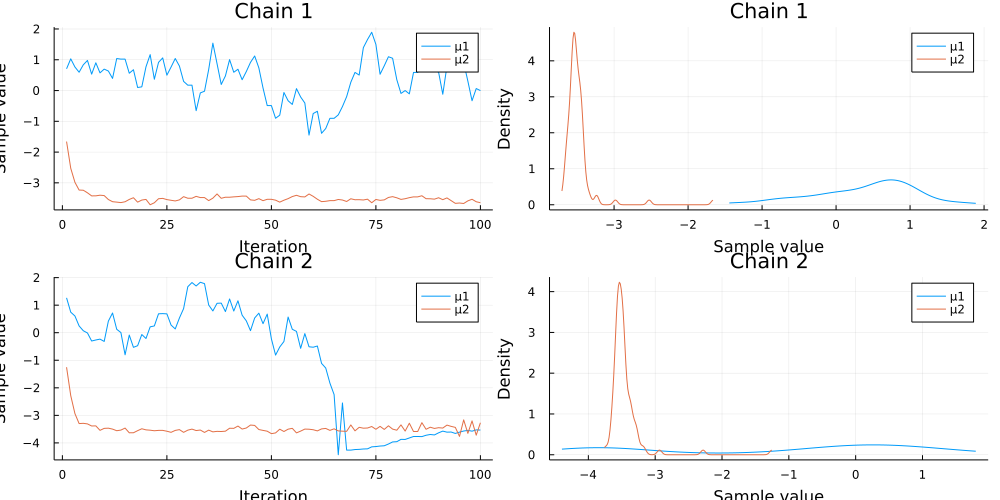

In [53]:
ids= findall(map(name -> occursin("μ", string(name)), names(tchain)))
p= plot(tchain[:, ids, :]; 
    legend=true, labels= ["μ1" "μ2"], colordim= :parameter)


In [54]:
tchain= tchain[:,:, 1]

Chains MCMC chain (100×105×1 Array{Float64,3}):

Iterations        = 1:1:100
Number of chains  = 1
Samples per chain = 100
Wall duration     = 821.92 seconds
Compute duration  = 821.87 seconds
parameters        = μ1, μ2, w[1], w[2], k[1], k[2], k[3], k[4], k[5], k[6], k[7], k[8], k[9], k[10], k[11], k[12], k[13], k[14], k[15], k[16], k[17], k[18], k[19], k[20], k[21], k[22], k[23], k[24], k[25], k[26], k[27], k[28], k[29], k[30], k[31], k[32], k[33], k[34], k[35], k[36], k[37], k[38], k[39], k[40], k[41], k[42], k[43], k[44], k[45], k[46], k[47], k[48], k[49], k[50], k[51], k[52], k[53], k[54], k[55], k[56], k[57], k[58], k[59], k[60], k[61], k[62], k[63], k[64], k[65], k[66], k[67], k[68], k[69], k[70], k[71], k[72], k[73], k[74], k[75], k[76], k[77], k[78], k[79], k[80], k[81], k[82], k[83], k[84], k[85], k[86], k[87], k[88], k[89], k[90], k[91], k[92], k[93], k[94], k[95], k[96], k[97], k[98], k[99], k[100]
internals         = lp

Summary Statistics
  parameters      mean       std 

In [55]:
function predict(x, y, w, μ)
    return Turing.logaddexp(
        log(w[1])+ logpdf(MvNormal([μ[1], μ[1]], 1.), [x,y]),
        log(w[2])+ logpdf(MvNormal([μ[2], μ[2]], 1.), [x,y])
        )
end

predict (generic function with 1 method)

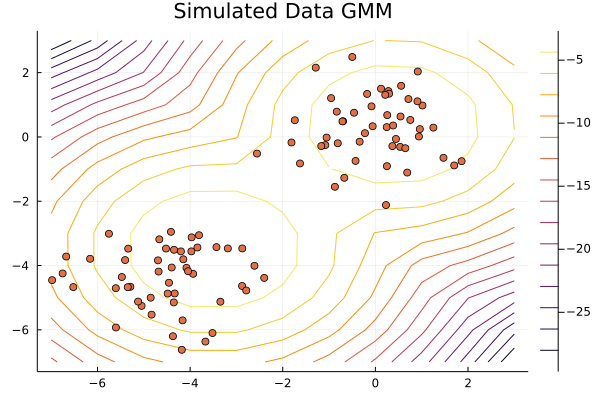

In [58]:
contour(range(-7, stop=3), range(-7, stop=3),
    (x,y) -> predict(x,y, [.5, .5], [mean(tchain[:μ1]), mean(tchain[:μ2])])
)

scatter!(x[1,:], x[2,:] ;legend=false, title= "Simulated Data GMM")

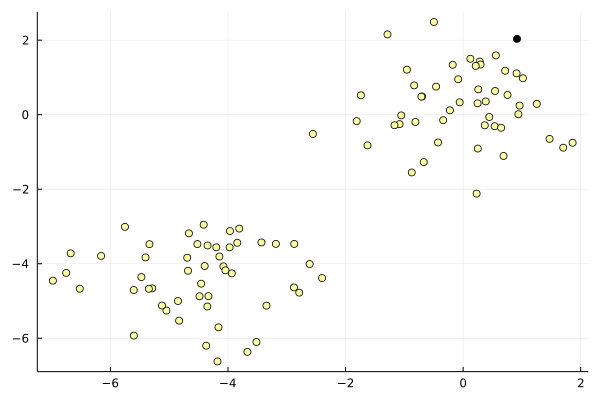

In [60]:
assignments= mean(MCMCChains.group(tchain, :k)).nt.mean
#head(assignments, 100)
scatter(x[1,:], x[2,:]; legend=false, zcolor=assignments)